In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import keras
from keras import layers

2024-10-17 00:30:17.779019: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 00:30:17.779100: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 00:30:17.779137: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 00:30:17.788238: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
y = df['activity']

In [6]:
X = df.drop(['activity' , 'people'] ,  axis =1)

In [7]:
X

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.29968,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.29974,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.30068,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.30088,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.30041,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.19482,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.21407,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,-0.47131,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,-0.17806,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489


In [10]:
import numpy as np
from collections import Counter

# split_sequence 함수 (수정됨)
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [11]:
# 실제 데이터 적용
sequence = df.drop(['activity','people'], axis=1).values  # 수치형 데이터
labels = df['activity'].values  # 범주형 레이블 'Rings_binned'

# 시퀀스 분리
n_steps = 7
X, y = split_sequence(sequence, labels, n_steps)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
x_train


array([[[ 9.67364007e+00,  3.83170000e+01, -4.59120000e+00, ...,
          8.41874866e-03,  9.17537392e-02, -4.06462211e-01],
        [ 9.37057742e+00,  3.76230000e+01, -5.02290000e+00, ...,
          8.38487629e-03,  9.15689701e-02, -3.54900151e-01],
        [ 1.00854727e+01,  3.79470000e+01, -4.85760000e+00, ...,
          1.06952301e-02,  1.03417745e-01, -6.09305002e-01],
        ...,
        [ 9.72523440e+00,  2.31430000e+01,  4.74040000e+00, ...,
          3.61173372e-02,  1.90045619e-01, -2.48472474e-01],
        [ 9.33850240e+00,  2.15560000e+01,  3.20830000e+00, ...,
          3.38459834e-02,  1.83972779e-01, -7.89343580e-02],
        [ 9.75807280e+00,  2.30280000e+01,  4.59640000e+00, ...,
          3.18804645e-02,  1.78551014e-01,  4.62338467e-02]],

       [[ 9.43911280e+00,  9.50020000e+00,  9.32130000e+00, ...,
          7.62800929e-07,  8.73384754e-04, -6.93292630e-02],
        [ 9.42153840e+00,  9.49210000e+00,  9.32190000e+00, ...,
          5.68044477e-07,  7.53687254e

In [17]:

n_classes = len(np.unique(y_train))
n_classes

19

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# LabelEncoder를 사용하여 문자열 레이블을 정수형 레이블로 변환
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# y_train과 y_test를 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

In [18]:
x_train.shape

(7290, 7, 270)

In [19]:
y_train.shape

(7290,)

In [20]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [25]:
y_train.shape

(7290, 19)

In [26]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [28]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 7, 270)]             0         []                            
                                                                                                  
 multi_head_attention_8 (Mu  (None, 7, 270)               1109262   ['input_3[0][0]',             
 ltiHeadAttention)                                                   'input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 7, 270)               0         ['multi_head_attention_8[0][0]
                                                                    ']                            
                                                                                            

 dropout_23 (Dropout)        (None, 7, 4)                 0         ['conv1d_20[0][0]']           
                                                                                                  
 conv1d_21 (Conv1D)          (None, 7, 270)               1350      ['dropout_23[0][0]']          
                                                                                                  
 layer_normalization_21 (La  (None, 7, 270)               540       ['conv1d_21[0][0]']           
 yerNormalization)                                                                                
                                                                                                  
 tf.__operators__.add_21 (T  (None, 7, 270)               0         ['layer_normalization_21[0][0]
 FOpLambda)                                                         ',                            
                                                                     'tf.__operators__.add_20[0][0
          

92/92 [==============================] - 2s 19ms/step - loss: 0.0369 - accuracy: 0.9916 - val_loss: 0.0195 - val_accuracy: 0.9979
Epoch 20/150
92/92 [==============================] - 2s 20ms/step - loss: 0.0323 - accuracy: 0.9921 - val_loss: 0.0196 - val_accuracy: 0.9966
Epoch 21/150
92/92 [==============================] - 2s 21ms/step - loss: 0.0366 - accuracy: 0.9892 - val_loss: 0.0198 - val_accuracy: 0.9973
Epoch 22/150
92/92 [==============================] - 2s 19ms/step - loss: 0.0496 - accuracy: 0.9842 - val_loss: 0.0141 - val_accuracy: 0.9986
Epoch 23/150
92/92 [==============================] - 2s 21ms/step - loss: 0.0200 - accuracy: 0.9952 - val_loss: 0.0242 - val_accuracy: 0.9973
Epoch 24/150
92/92 [==============================] - 2s 20ms/step - loss: 0.0303 - accuracy: 0.9928 - val_loss: 0.0208 - val_accuracy: 0.9973
Epoch 25/150
92/92 [==============================] - 2s 20ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0299 - val_accuracy: 0.9952
Epoch 26/150

[0.012144634500145912, 0.9978058338165283]

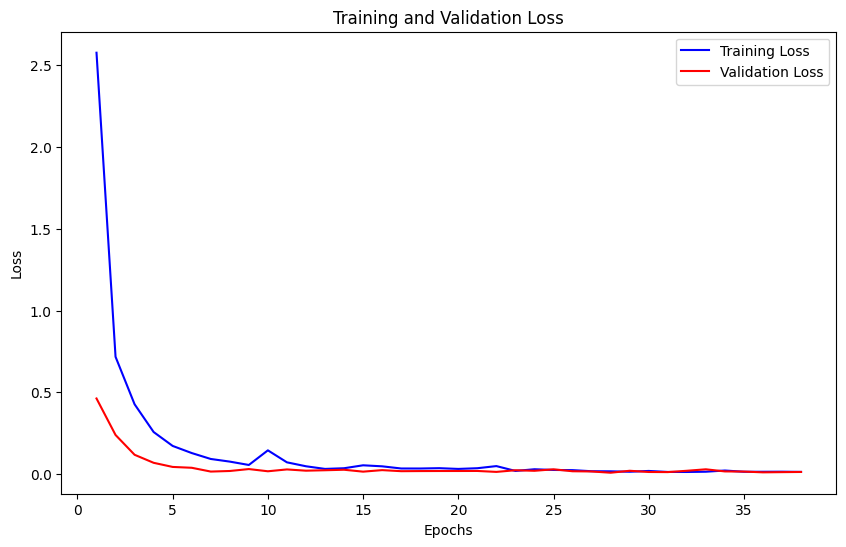

In [29]:
# 손실과 검증 손실 값 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

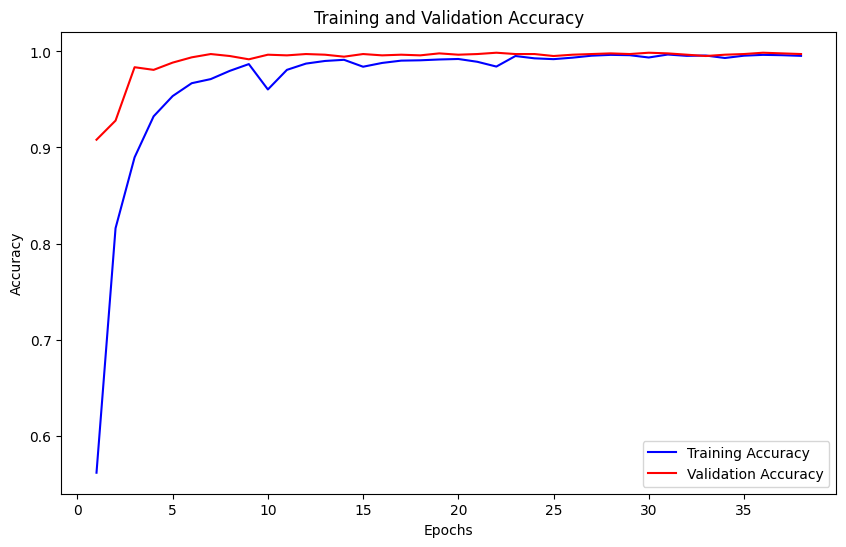

In [30]:
# 정확도와 검증 정확도 값 가져오기
acc = history.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [39]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# 이미 원-핫 인코딩된 y_train과 y_test를 정수 인덱스로 변환
y_train_index = np.argmax(y_train, axis=-1)
y_test_index = np.argmax(y_test, axis=-1)

# 모델 예측 (정수 인덱스로 변환)
predy = model.predict(x_test)
predy = np.argmax(predy, axis=-1)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(confusion_matrix(y_test_index, predy))

# 분류 리포트 출력
print("\nClassification Report:")
print(classification_report(y_test_index, predy))

# 정확도 출력
print("\nAccuracy Score:")
print(accuracy_score(y_test_index, predy))

57/57 [==============================] - 0s 4ms/step
Confusion Matrix:
[[ 89   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  89   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  86   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0 104   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0  93   0   0   0   0   2   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0  93   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 